### Expand segmentation labels without overlap
[link to example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_expand_labels.html#sphx-glr-auto-examples-segmentation-plot-expand-labels-py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


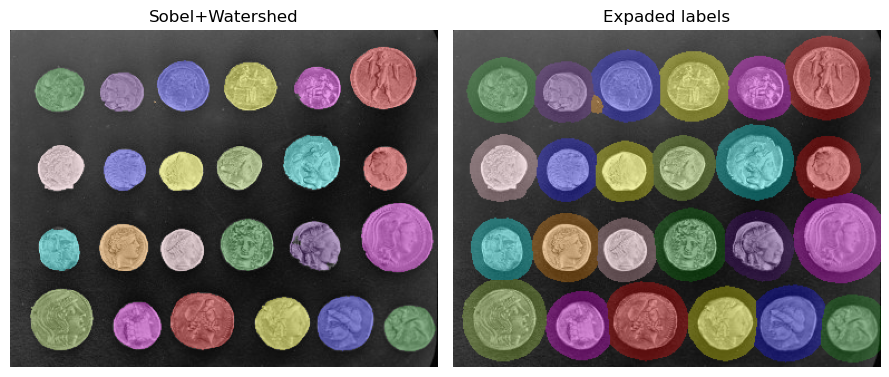

In [2]:
coins = skimage.data.coins()

# Make segmentation using edge-detection and watershed.
edges = skimage.filters.sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150] = foreground

ws = skimage.segmentation.watershed(edges, markers)
seg1 = skimage.measure.label(ws == foreground)

expanded = skimage.segmentation.expand_labels(seg1, distance=10)

# Show the segmentations.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), sharex=True, sharey=True)

color1 = skimage.color.label2rgb(seg1, image=coins, bg_label=0)
axes[0].imshow(color1)
axes[0].set_title("Sobel+Watershed")

color2 = skimage.color.label2rgb(expanded, image=coins, bg_label=0)
axes[1].imshow(color2)
axes[1].set_title('Expaded labels')

for a in axes:
    a.axis('off')
fig.tight_layout()
plt.show()